# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
#Passo 1: Entendimento do Desafio
#Passo 2: Entendimento da Área/Empresa
#Passo 3: Extração/Obtenção de Dados
import pandas as pd
tabela = pd.read_csv("advertising.csv")
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


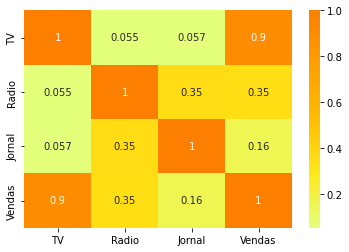

In [8]:
#Passo 4: Ajuste de Dados (Tratamento/Limpeza): tabela.info()
#Passo 5: Análise Exploratória
display(tabela.corr())

# seaborn usa o matplotlib para criar o gráfico
import seaborn as sns

# matplotlib cria o gráfico
import matplotlib.pyplot as plt


# cria o gráfico
# "wistia" é o padrão de cor no gráfico; "annot" é para exibir a correlação no gráfico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

# exibe o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [32]:
#Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
# y -> quem eu quero prever
y = tabela["Vendas"]

# x -> quem vou usar para prever, ou seja, o resto da tabela
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

# separar em x treino, x teste, y treino, y teste
# tem que ser nesta ordem
# o ideal é que o modelo de treino seja 70% da base de dados e 30% para o modelo teste
# caso queira medir esta amostragem, utilizar: test_size=0.3 (para 30%)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [33]:
#importa a IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#cria a IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treina a IA
# "fit" é para treinar o modelo 
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [34]:
#Passo 7: Interpretação de Resultados
from sklearn.metrics import r2_score

# fazer as previsões
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# comparar a previsão com y_teste
print(r2_score(y_teste, previsao_arvoredecisao))
print(r2_score(y_teste, previsao_regressaolinear))

0.9579818812503463
0.884564798849796


#### Visualização Gráfica das Previsões

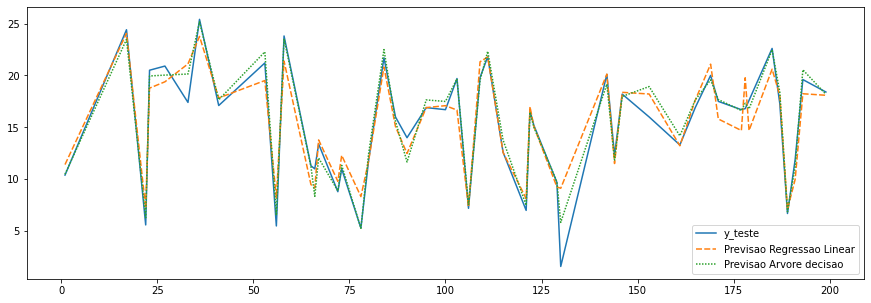

In [35]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar["Previsao Regressao Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsao Arvore decisao"] = previsao_arvoredecisao

# exibe o gráfico e o size ajusta o tamanho
plt.figure(figsize=(15,5))

sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [36]:
tabela_nova = pd.read_csv("novos.csv")
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [37]:
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

[ 7.761  8.015 20.775]
